In [396]:
import numpy as np
import pandas as pd
import os
import scipy.spatial
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score

# Data Preprocessing

In [322]:
pathTrainPath = pd.DataFrame(data=pd.read_csv('PATH_DATA/path-5-fold/path10/path.train1.txt',header=None))
pathTrainUA = pd.DataFrame(data=pd.read_csv('UA_DATA/ua-5-fold/ua10/ua.train1.txt',header=None))
pathTrainUA = pathTrainUA.replace([np.inf, -np.inf], np.nan)
pathTrainPath = pathTrainPath.replace([np.inf, -np.inf], np.nan)

In [323]:
dfTrPth = pathTrainPath[pathTrainPath[0] == 'm']
dfTrUA = pathTrainUA[pathTrainUA[0] == 'm']
meanTrPath = dfTrPth.mean()
dfTrPth = dfTrPth.replace(np.nan, meanTrPath)
meanTrUA = dfTrUA.mean()
dfTrUA = dfTrUA.replace(np.nan, meanTrUA)
A1 = dfTrPth.values
A2 = dfTrUA.values
B = np.hstack((A1,A2))
B = np.delete(B, [0,2], axis=1)

In [325]:
B.shape

(375, 2)

In [326]:
XTrain = B

In [327]:
XTrain

array([[-19.0595, -21.3944],
       [-76.6922, -21.7032],
       [-20.396, -24.5714],
       [-21.0675, -20.768],
       [-19.9731, -22.203000000000003],
       [-21.3464, -99.3446],
       [-20.2213, -23.34],
       [-76.9701, -20.5813],
       [-20.5764, -21.1695],
       [-20.6655, -21.2469],
       [-22.6409, -20.4691],
       [-20.1713, -21.4603],
       [-20.6551, -21.3025],
       [-19.2376, -23.3594],
       [-75.6214, -20.1207],
       [-19.9261, -22.1174],
       [-21.5545, -21.8323],
       [-19.192999999999998, -25.0839],
       [-19.3795, -21.1532],
       [-19.9069, -100.37899999999999],
       [-76.7251, -21.9802],
       [-19.5315, -21.8896],
       [-22.6598, -21.8975],
       [-20.3861, -21.9865],
       [-19.6737, -19.8113],
       [-20.6208, -22.1508],
       [-20.1234, -19.8679],
       [-20.9912, -21.96],
       [-21.6326, -20.8854],
       [-20.8066, -21.2866],
       [-77.1408, -20.7038],
       [-21.0106, -30.119553153153152],
       [-76.7315, -20.4028],
     

In [328]:
meanTrain = dfTrain.mean()
dfTrain = dfTrain.replace(np.nan, meanTrain)

In [329]:
dfTestPath = pd.DataFrame(data=pd.read_csv('PATH_DATA/path-5-fold/path10/path.test1.txt',header=None))
dfTestUA = pd.DataFrame(data=pd.read_csv('UA_DATA/ua-5-fold/ua10/ua.test1.txt',header=None))
for i in range(2,6):
    stringtestPath = "PATH_DATA/path-5-fold/path10/path.test%d.txt" %(i)
    stringtrainPath = "PATH_DATA/path-5-fold/path10/path.train%d.txt" %(i)
    pathTestPath2 = pd.DataFrame(data=pd.read_csv(stringtestPath,header=None))
    pathTrainPath2 = pd.DataFrame(data=pd.read_csv(stringtrainPath,header=None))
    dfTestPath = dfTestPath.append(pathTestPath2)
    dfTestPath = dfTestPath.append(pathTrainPath2)    
    stringtestUA = "UA_DATA/ua-5-fold/ua10/ua.test%d.txt" %(i)
    stringtrainUA = "UA_DATA/ua-5-fold/ua10/ua.train%d.txt" %(i)
    pathTestUA2 = pd.DataFrame(data=pd.read_csv(stringtestUA,header=None))
    pathTrainUA2 = pd.DataFrame(data=pd.read_csv(stringtrainUA,header=None))
    dfTestUA = dfTestUA.append(pathTestUA2)
    dfTestUA = dfTestUA.append(pathTrainUA2)

In [330]:
dfTestPath = dfTestPath.reset_index(drop=True)
dfTestUA = dfTestUA.reset_index(drop=True)

In [331]:
dfTestPath = dfTestPath.replace([np.inf, -np.inf], np.nan)
meanTest = dfTestPath.mean()
dfTestPath = dfTestPath.replace(np.nan, meanTest)
dfTestUA = dfTestUA.replace([np.inf, -np.inf], np.nan)
meanUA = dfTestUA.mean()
dfTestUA = dfTestUA.replace(np.nan, meanUA)

In [332]:
dfTestPath

,0,1
0,m,-20.29240
1,m,-20.80980
2,m,-21.91850
3,m,-20.20910
4,m,-23.18970
5,m,-20.83840
6,m,-21.31600
7,m,-20.38210
8,m,-21.14930
9,m,-20.41210


In [333]:
dfTestUA

,0,1
0,m,-21.11850
1,m,-22.16670
2,m,-27.66469
3,m,-23.91450
4,m,-22.01080
5,m,-27.66469
6,m,-22.49020
7,m,-23.05260
8,m,-102.74200
9,m,-22.86330


In [334]:
dfTest[0].size

11321

In [335]:
dfTrain[0].size

375

In [336]:
A1 = dfTestPath.values
A2 = dfTestUA.values
B = np.hstack((A1,A2))
XTest = B
XTest

array([['m', -20.2924, 'm', -21.1185],
       ['m', -20.8098, 'm', -22.1667],
       ['m', -21.9185, 'm', -27.66469003755679],
       ...,
       ['b', -20.4051, 'b', -21.8547],
       ['b', -30.2013, 'b', -22.5666],
       ['b', -26.189790070220432, 'b', -22.59]], dtype=object)

In [337]:
YTest = XTest[:,0]
XTest = np.delete(XTest, [0,2], axis=1)

In [380]:
samplesLabel = {'m': 1,'b': 0} 
YTest = np.array([samplesLabel[item] for item in YTest])

In [382]:
YTest

array([1, 1, 1, ..., 0, 0, 0])

In [338]:
XTrain.shape

(375, 2)

In [356]:
YTest.shape

(11321,)

In [401]:
XTest.shape

(11321, 2)

# PCA code

## Malware PCA Model

In [339]:
XTrain =  np.transpose(XTrain)

In [340]:
mean = []
for i in range(XTrain.shape[0]):
    sum = 0.0
    for j in range(XTrain.shape[1]):
        sum = sum + XTrain[i][j]
    mean.append(sum/XTrain.shape[1])
mean

[-27.333740266666684, -30.119553153153163]

In [341]:
# Normalize XTrain
A = np.zeros_like(XTrain,dtype=float)
for i in range(XTrain.shape[0]):
    for j in range(XTrain.shape[1]):
        A[i][j] = XTrain[i][j] - mean[i]

In [343]:
# Run SVD
u, s, vh = np.linalg.svd(A, full_matrices=False)

In [344]:
s

array([440.86802532, 350.08134839])

In [345]:
u

array([[-0.08461604,  0.99641363],
       [ 0.99641363,  0.08461604]])

In [307]:
# Eigen Vector and Eigen Values
eigenValues = []
for i in range(s.shape[0]):
    eigenValues.append((s[i]*s[i])/XTrain.shape[1])
    print("Eigen Value {:d} = {:.4f}".format(i+1,eigenValues[i]))
    print("Eigen Vector {:d} = ".format(i+1))
    print(u[:,i])

Eigen Value 1 = 518.3056
Eigen Vector 1 = 
[-0.08461604  0.99641363]
Eigen Value 2 = 326.8185
Eigen Vector 2 = 
[0.99641363 0.08461604]


In [308]:
UNew = u
delta = np.matmul(np.transpose(UNew),A)

In [318]:
delta.shape

(2, 375)

In [320]:
u.shape

(2, 2)

## Benign PCA MODEL

In [367]:
pathTrainPathBenign = pd.DataFrame(data=pd.read_csv('PATH_DATA/path-5-fold/path10/path.train1.txt',header=None))
pathTrainUABenign = pd.DataFrame(data=pd.read_csv('UA_DATA/ua-5-fold/ua10/ua.train1.txt',header=None))
pathTrainUABenign = pathTrainUABenign.replace([np.inf, -np.inf], np.nan)
pathTrainPathBenign = pathTrainPathBenign.replace([np.inf, -np.inf], np.nan)
dfTrPthBenign = pathTrainPathBenign[pathTrainPathBenign[0] == 'b']
dfTrUABenign = pathTrainUABenign[pathTrainUABenign[0] == 'b']
meanBenTrPathBenign = dfTrPthBenign.mean()
dfTrPthBenign = dfTrPthBenign.replace(np.nan, meanBenTrPathBenign)
meanBenTrUABenign = dfTrUABenign.mean()
dfTrUABenign = dfTrUABenign.replace(np.nan, meanBenTrUABenign)
A1Ben = dfTrPthBenign.values
A2Ben = dfTrUABenign.values
BBen = np.hstack((A1Ben,A2Ben))
BBen = np.delete(BBen, [0,2], axis=1)
XTrainBen = BBen

XTrainBen =  np.transpose(XTrainBen)
meanBen = []
for i in range(XTrainBen.shape[0]):
    sum = 0.0
    for j in range(XTrainBen.shape[1]):
        sum = sum + XTrainBen[i][j]
    meanBen.append(sum/XTrainBen.shape[1])

# Normalize XTrainBen
ABen = np.zeros_like(XTrainBen,dtype=float)
for i in range(XTrainBen.shape[0]):
    for j in range(XTrainBen.shape[1]):
        ABen[i][j] = XTrainBen[i][j] - meanBen[i]
        
# Run SVD
uBen, sBen, vhBen = np.linalg.svd(ABen, full_matrices=False)

# Eigen Vector and Eigen Values
eigenValuesBen = []
for i in range(sBen.shape[0]):
    eigenValuesBen.append((sBen[i]*sBen[i])/XTrainBen.shape[1])
    print("Eigen Value {:d} = {:.4f}".format(i+1,eigenValuesBen[i]))
    print("Eigen Vector {:d} = ".format(i+1))
    print(uBen[:,i])

UNewBen = uBen
deltaBenign = np.matmul(np.transpose(UNewBen),ABen)

Eigen Value 1 = 601.8651
Eigen Vector 1 = 
[-0.99995827  0.00913549]
Eigen Value 2 = 4.1830
Eigen Vector 2 = 
[0.00913549 0.99995827]


# Scoring Phase

## Normalize Test samples

In [315]:
XTest =  np.transpose(XTest)
XTest.shape

(2, 11321)

In [316]:
# Normalize XTest
Y = np.zeros_like(XTest,dtype=float)
for i in range(XTest.shape[0]):
    for j in range(XTest.shape[1]):
        Y[i][j] = XTest[i][j] - mean[i]
Y

array([[ 7.04134027,  6.52394027,  5.41524027, ...,  6.92864027,
        -2.86755973,  1.1439502 ],
       [ 9.00105315,  7.95285315,  2.45486312, ...,  8.26485315,
         7.55295315,  7.52955315]])

## Distance From Each column in Delta matrix - MALWARE MODEL

In [361]:
finalDIST=[]
for i in range(Y.shape[1]):
    WY0 = np.matmul(np.transpose(UNew),Y[:,i])
    eDist = []
    for i in range(delta.shape[1]):
        eDist.append(scipy.spatial.distance.euclidean(WY0,delta[:,i]))    
    finalDIST.append(min(eDist))

## Distance From Each column in Delta matrix - BENIGN MODEL

In [369]:
finalDISTBenign=[]
for i in range(Y.shape[1]):
    WY0 = np.matmul(np.transpose(UNewBen),Y[:,i])
    eDist = []
    for i in range(deltaBenign.shape[1]):
        eDist.append(scipy.spatial.distance.euclidean(WY0,delta[:,i]))    
    finalDISTBenign.append(min(eDist))

# Result Analysis

## Scatter Plot for predicted values 

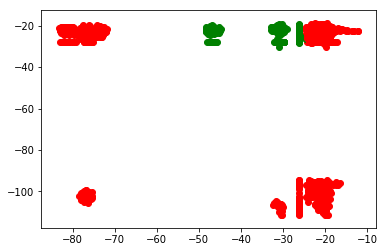

In [383]:
YPredicted=[]
markers = ["s" , "o" ]    # s== malware=1 ; o == benign=0
for i in range(YTest.shape[0]):
    if(YTest[i]=="m"):
        markSymbol = "s"
    else:
        markSymbol = "o"
    if finalDIST[i]<=finalDISTBenign[i]:
        plt.scatter(XTest[i][0], XTest[i][1], marker=markSymbol, c='red')      # is predicted Malware
        YPredicted.append(1)
    else:
        plt.scatter(XTest[i][0], XTest[i][1], marker=markSymbol, c='green')    # is predicted Benign
        YPredicted.append(0)
plt.show()    

## PR curve 

In [402]:
precision, recall, thresholds = precision_recall_curve(YTest, finalDIST)

Text(0.5,1,'Precision-Recall curve:0.80')

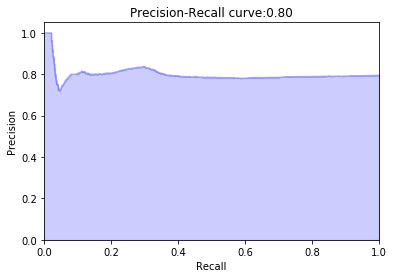

In [403]:
average_precision = average_precision_score(YTest, finalDIST)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve:{0:0.2f}'.format(
          average_precision))